In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt

#plt.style.use(['science', 'notebook'])
#%matplotlib inline


In [87]:
data_file = "conso.txt"

In [88]:
def read_text(filename):
    f = open(filename, "r")
    text = f.readlines()
    f.close()
    print(text)

def save_text(filename):
    f = open(filename, "w")
    f.write(text)
    f.close()


#read_text(data_file)
def get_data(filename):    
    data = pd.read_csv(filename)
    #data['time'] = pd.to_datetime(data['time'])  #.dt.tz_convert(None)
    #data.info()
    #print(data.tail(5))
    return data


In [89]:
text='test'
filename='text.txt'
#save_text(filename)

In [90]:
# read data with pandas
data = get_data(data_file)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Conso   1013 non-null   float64
dtypes: float64(1)
memory usage: 8.0 KB


In [91]:
data['interval']=3600/data['Conso']
data

,Conso,interval
0,0.19,18947.368421
1,0.19,18947.368421
2,0.19,18947.368421
3,0.19,18947.368421
4,0.19,18947.368421
...,...,...
1008,0.16,22500.000000
1009,0.16,22500.000000
1010,0.17,21176.470588
1011,0.17,21176.470588


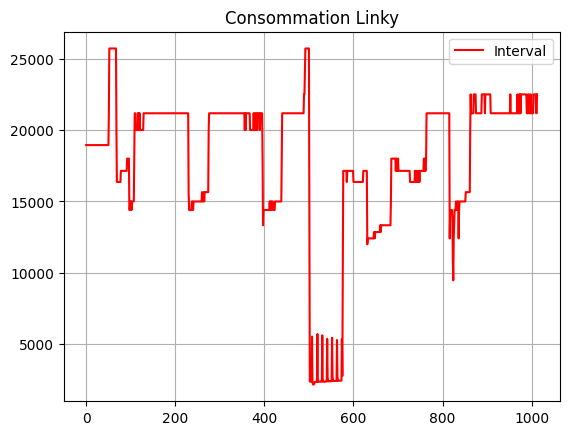

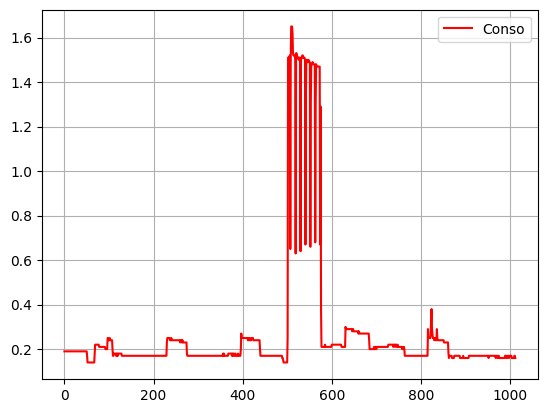

In [92]:

plt.title('Consommation Linky')
plt.plot(data['interval'], color='red',label='Interval')
plt.grid()
plt.legend()
plt.show()
plt.plot(data['Conso'], color='red',label='Conso')
plt.grid()
plt.legend()

### conso.csv sur WD6TB mis à jour avec PI4

In [93]:
def get_data2(filename):    
    data = pd.read_csv(filename, names=["Interval","kWh"])
    return data

In [94]:
old = False

if old:
    #conso_file = r"C:\Users\jean\Documents\conso.csv"
    conso_file = r"Y:\Documents\conso_old.csv"
    conso_file = r"Y:\Documents\conso - Copy (2).csv"
else:
    conso_file = r"Y:\Documents\conso.csv"
#old = False
conso_data = get_data2(conso_file)
conso_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173259 entries, 0 to 173258
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Interval  173259 non-null  int64  
 1   kWh       173259 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 2.6 MB


In [95]:
conso_data = conso_data.dropna()
conso_data

,Interval,kWh
0,26289,0.14
1,26243,0.14
2,25885,0.14
3,25754,0.14
4,25774,0.14
...,...,...
173254,1554,2.32
173255,1546,2.33
173256,1552,2.32
173257,1545,2.33


<Axes: >

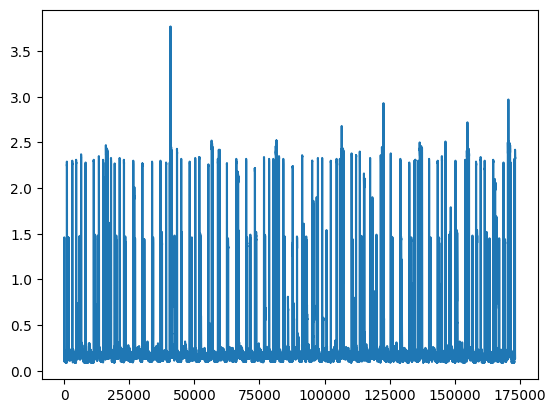

In [96]:
conso_data['kWh'].plot()

In [97]:
conso_data['sec']=conso_data['Interval']/1000
conso_data['Wh']=3600000/conso_data['Interval']
conso_data['cumul(ms)']=conso_data['Interval'].cumsum(axis=0)

conso_data

,Interval,kWh,sec,Wh,cumul(ms)
0,26289,0.14,26.289,136.939404,26289
1,26243,0.14,26.243,137.179438,52532
2,25885,0.14,25.885,139.076685,78417
3,25754,0.14,25.754,139.784111,104171
4,25774,0.14,25.774,139.675642,129945
...,...,...,...,...,...
173254,1554,2.32,1.554,2316.602317,4096927357
173255,1546,2.33,1.546,2328.589909,4096928903
173256,1552,2.32,1.552,2319.587629,4096930455
173257,1545,2.33,1.545,2330.097087,4096932000


In [98]:
# index dernier echantillon
l=len(conso_data)-1
l

173258

In [99]:
# cumtime = int(conso_data['cumul(ms)'].tail(1).values[0]*1000)
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)
cumtime

4096933546000

In [100]:
from datetime import datetime, timedelta
now = datetime.now()
# conso.csv dynamique
base = now - timedelta(microseconds=cumtime)
base  # date de début


datetime.datetime(2024, 3, 7, 1, 48, 3, 969441)

In [101]:
old

False

In [102]:
if old:
    base = dt.datetime(2023, 8, 1, 10, 45, 0) - timedelta(microseconds=cumtime)

conso_data['dates'] = [base + dt.timedelta(microseconds=t*1000) for t in conso_data['cumul(ms)']]
conso_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173259 entries, 0 to 173258
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Interval   173259 non-null  int64         
 1   kWh        173259 non-null  float64       
 2   sec        173259 non-null  float64       
 3   Wh         173259 non-null  float64       
 4   cumul(ms)  173259 non-null  int64         
 5   dates      173259 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 7.9 MB


In [103]:
conso_data['days']= [d.strftime('%d/%m/%Y') for d in conso_data['dates']]    #[str(d.month)+'-'+str(d.day) for d in conso_data['dates']]
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,26289,0.14,26.289,136.939404,26289,2024-03-07 01:48:30.258441,07/03/2024
1,26243,0.14,26.243,137.179438,52532,2024-03-07 01:48:56.501441,07/03/2024
2,25885,0.14,25.885,139.076685,78417,2024-03-07 01:49:22.386441,07/03/2024
3,25754,0.14,25.754,139.784111,104171,2024-03-07 01:49:48.140441,07/03/2024
4,25774,0.14,25.774,139.675642,129945,2024-03-07 01:50:13.914441,07/03/2024
...,...,...,...,...,...,...,...
173254,1554,2.32,1.554,2316.602317,4096927357,2024-04-23 11:50:11.326441,23/04/2024
173255,1546,2.33,1.546,2328.589909,4096928903,2024-04-23 11:50:12.872441,23/04/2024
173256,1552,2.32,1.552,2319.587629,4096930455,2024-04-23 11:50:14.424441,23/04/2024
173257,1545,2.33,1.545,2330.097087,4096932000,2024-04-23 11:50:15.969441,23/04/2024


In [104]:
#conso_data
conso_data.head(1),conso_data.tail(1)

(   Interval   kWh     sec          Wh  cumul(ms)                      dates  \
 0     26289  0.14  26.289  136.939404      26289 2024-03-07 01:48:30.258441   
 
          days  
 0  07/03/2024  ,
         Interval   kWh    sec           Wh   cumul(ms)  \
 173258      1546  2.33  1.546  2328.589909  4096933546   
 
                             dates        days  
 173258 2024-04-23 11:50:17.515441  23/04/2024  )

In [105]:
# tranche journalière
now = datetime.now()
month = now.month
year = now.year
day = now.strftime('%d/%m/%Y')    #str(now.month)+'-'+str(now.day)
day, month, year

('23/04/2024', 4, 2024)

In [106]:
conso_data[conso_data['days']==day]

,Interval,kWh,sec,Wh,cumul(ms),dates,days
171824,24339,0.15,24.339,147.910761,4054337145,2024-04-23 00:00:21.114441,23/04/2024
171825,23805,0.15,23.805,151.228733,4054360950,2024-04-23 00:00:44.919441,23/04/2024
171826,22778,0.16,22.778,158.047239,4054383728,2024-04-23 00:01:07.697441,23/04/2024
171827,23013,0.16,23.013,156.433320,4054406741,2024-04-23 00:01:30.710441,23/04/2024
171828,23398,0.15,23.398,153.859304,4054430139,2024-04-23 00:01:54.108441,23/04/2024
...,...,...,...,...,...,...,...
173254,1554,2.32,1.554,2316.602317,4096927357,2024-04-23 11:50:11.326441,23/04/2024
173255,1546,2.33,1.546,2328.589909,4096928903,2024-04-23 11:50:12.872441,23/04/2024
173256,1552,2.32,1.552,2319.587629,4096930455,2024-04-23 11:50:14.424441,23/04/2024
173257,1545,2.33,1.545,2330.097087,4096932000,2024-04-23 11:50:15.969441,23/04/2024


In [107]:
day

'23/04/2024'

In [108]:
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,26289,0.14,26.289,136.939404,26289,2024-03-07 01:48:30.258441,07/03/2024
1,26243,0.14,26.243,137.179438,52532,2024-03-07 01:48:56.501441,07/03/2024
2,25885,0.14,25.885,139.076685,78417,2024-03-07 01:49:22.386441,07/03/2024
3,25754,0.14,25.754,139.784111,104171,2024-03-07 01:49:48.140441,07/03/2024
4,25774,0.14,25.774,139.675642,129945,2024-03-07 01:50:13.914441,07/03/2024
...,...,...,...,...,...,...,...
173254,1554,2.32,1.554,2316.602317,4096927357,2024-04-23 11:50:11.326441,23/04/2024
173255,1546,2.33,1.546,2328.589909,4096928903,2024-04-23 11:50:12.872441,23/04/2024
173256,1552,2.32,1.552,2319.587629,4096930455,2024-04-23 11:50:14.424441,23/04/2024
173257,1545,2.33,1.545,2330.097087,4096932000,2024-04-23 11:50:15.969441,23/04/2024


In [109]:
# group by day
grouped = conso_data[['days','kWh']].groupby('days', sort=False)
'''conso_graph=[]
for name, group in grouped:
    if name=='01/04/2024':print(group)
    #print("\n", name, len(group)/1000)
    conso_graph.append((name,len(group)/1000))'''
grouped


In [110]:
# count elements in each group => conso in watts => convert to kW
(grouped.count()/1000)

,kWh
days,
07/03/2024,3.140
08/03/2024,3.751
09/03/2024,3.082
10/03/2024,3.534
11/03/2024,4.544
12/03/2024,3.554
13/03/2024,3.539
14/03/2024,3.655
15/03/2024,3.563


In [111]:
# mean of all instant conso
total_mean = conso_data[['kWh']].mean()
total_mean


kWh    0.327616
dtype: float64

In [112]:
# mean by day from 07/03
mean=(grouped.count()/1000).mean()
mean

kWh    3.609563
dtype: float64

In [113]:
filename='conso_par_jour.csv'
df_grp = grouped.count()/1000
df_grp.to_csv(filename)
filename='../conso_par_jour.csv'
df_grp.to_csv(filename)

In [114]:
df_grp

,kWh
days,
07/03/2024,3.140
08/03/2024,3.751
09/03/2024,3.082
10/03/2024,3.534
11/03/2024,4.544
12/03/2024,3.554
13/03/2024,3.539
14/03/2024,3.655
15/03/2024,3.563


In [115]:
#manuel
#day = '11/03/2024'


In [116]:
# conso day
conso_day = conso_data[conso_data['days']==day]
len(conso_day)

1435

In [117]:
conso_day

,Interval,kWh,sec,Wh,cumul(ms),dates,days
171824,24339,0.15,24.339,147.910761,4054337145,2024-04-23 00:00:21.114441,23/04/2024
171825,23805,0.15,23.805,151.228733,4054360950,2024-04-23 00:00:44.919441,23/04/2024
171826,22778,0.16,22.778,158.047239,4054383728,2024-04-23 00:01:07.697441,23/04/2024
171827,23013,0.16,23.013,156.433320,4054406741,2024-04-23 00:01:30.710441,23/04/2024
171828,23398,0.15,23.398,153.859304,4054430139,2024-04-23 00:01:54.108441,23/04/2024
...,...,...,...,...,...,...,...
173254,1554,2.32,1.554,2316.602317,4096927357,2024-04-23 11:50:11.326441,23/04/2024
173255,1546,2.33,1.546,2328.589909,4096928903,2024-04-23 11:50:12.872441,23/04/2024
173256,1552,2.32,1.552,2319.587629,4096930455,2024-04-23 11:50:14.424441,23/04/2024
173257,1545,2.33,1.545,2330.097087,4096932000,2024-04-23 11:50:15.969441,23/04/2024


In [118]:
filename='conso_jour.csv'
conso_day.to_csv(filename)
filename='../conso_jour.csv'
conso_day.to_csv(filename)

In [119]:
conso_day.head(1).dates, conso_day.tail(1).dates


(171824   2024-04-23 00:00:21.114441
 Name: dates, dtype: datetime64[ns],
 173258   2024-04-23 11:50:17.515441
 Name: dates, dtype: datetime64[ns])

In [120]:
conso_day.loc[:,'dates']

171824   2024-04-23 00:00:21.114441
171825   2024-04-23 00:00:44.919441
171826   2024-04-23 00:01:07.697441
171827   2024-04-23 00:01:30.710441
171828   2024-04-23 00:01:54.108441
                    ...            
173254   2024-04-23 11:50:11.326441
173255   2024-04-23 11:50:12.872441
173256   2024-04-23 11:50:14.424441
173257   2024-04-23 11:50:15.969441
173258   2024-04-23 11:50:17.515441
Name: dates, Length: 1435, dtype: datetime64[ns]

In [121]:
conso_day['heure']=conso_day.loc[:,'dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
#=[x.hour for x in conso_day['dates']]
conso_day
df= conso_day.set_index('heure')
df

C:\Users\jean\AppData\Local\Temp\ipykernel_1212\2932063292.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conso_day['heure']=conso_day.loc[:,'dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))


,Interval,kWh,sec,Wh,cumul(ms),dates,days
heure,,,,,,,
0:0:21,24339,0.15,24.339,147.910761,4054337145,2024-04-23 00:00:21.114441,23/04/2024
0:0:44,23805,0.15,23.805,151.228733,4054360950,2024-04-23 00:00:44.919441,23/04/2024
0:1:7,22778,0.16,22.778,158.047239,4054383728,2024-04-23 00:01:07.697441,23/04/2024
0:1:30,23013,0.16,23.013,156.433320,4054406741,2024-04-23 00:01:30.710441,23/04/2024
0:1:54,23398,0.15,23.398,153.859304,4054430139,2024-04-23 00:01:54.108441,23/04/2024
...,...,...,...,...,...,...,...
11:50:11,1554,2.32,1.554,2316.602317,4096927357,2024-04-23 11:50:11.326441,23/04/2024
11:50:12,1546,2.33,1.546,2328.589909,4096928903,2024-04-23 11:50:12.872441,23/04/2024
11:50:14,1552,2.32,1.552,2319.587629,4096930455,2024-04-23 11:50:14.424441,23/04/2024


In [122]:
here = now.strftime('%H:%M:%S')
here, len(df)/1000

('11:50:30', 1.435)

In [123]:
conso_jour=len(df['kWh'])

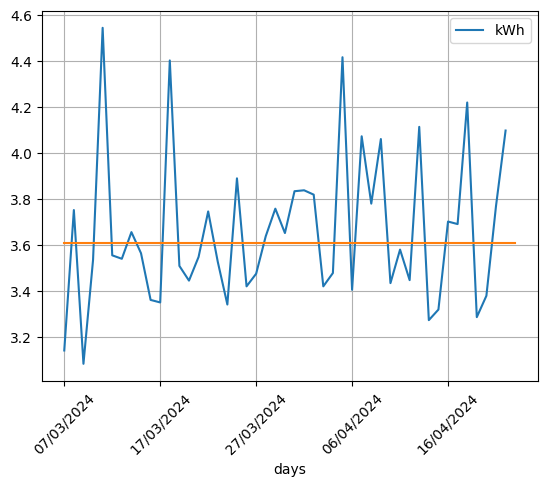

In [124]:
df_grp.iloc[:-1].plot()#kind='bar')
plt.plot((0,len(df_grp)-1),(mean,mean))
plt.xticks(rotation=45)
plt.grid()


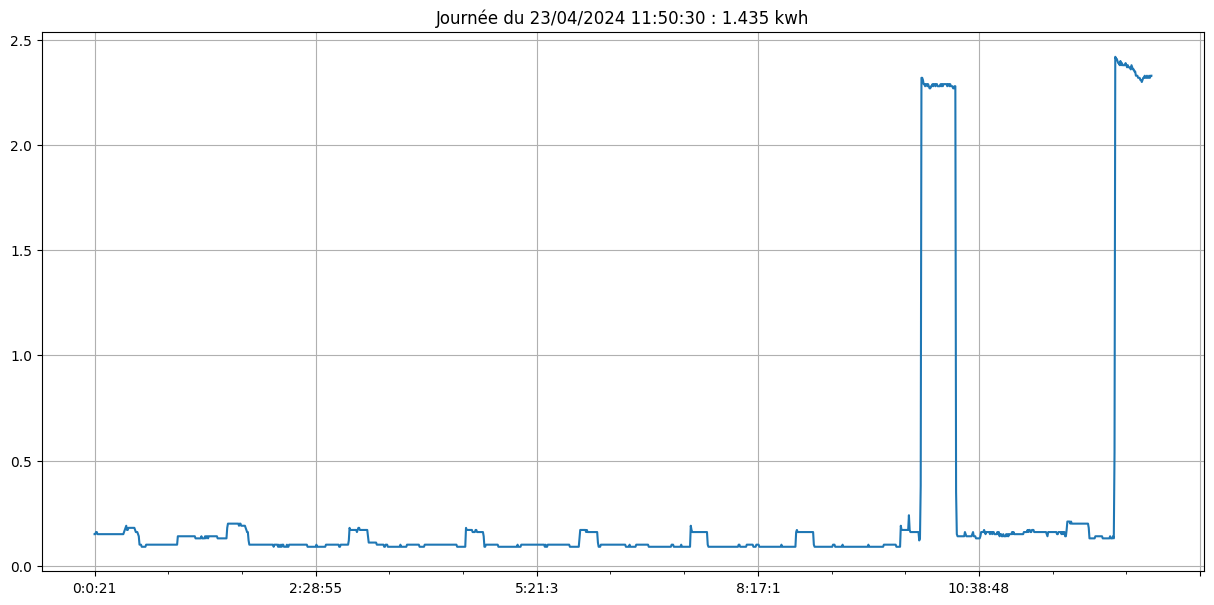

In [125]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
# consommation d'une journée entière à partir de minuit
fig, ax = plt.subplots()
major_ticks=300;minor_ticks=100
ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))
# the size of A4 paper
fig.set_size_inches(15, 7)
plt.plot(df['kWh'])
#plt.plot(conso_day['heure'],conso_day['kWh'])
plt.title(f'Journée du {day} {here} : {conso_jour/1000} kwh')
plt.grid()

In [126]:
df['power']=[y for x,y in zip(df['Interval'],df['kWh'])]

In [127]:
df['power']

heure
0:0:21      0.15
0:0:44      0.15
0:1:7       0.16
0:1:30      0.16
0:1:54      0.15
            ... 
11:50:11    2.32
11:50:12    2.33
11:50:14    2.32
11:50:15    2.33
11:50:17    2.33
Name: power, Length: 1435, dtype: float64

<Axes: xlabel='heure'>

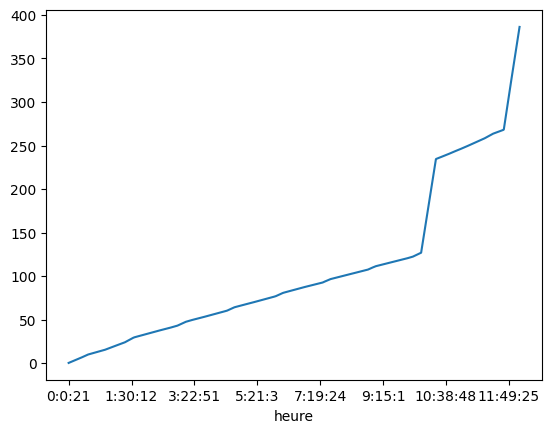

In [128]:
evo=df['power'].cumsum()
evo.plot()

98

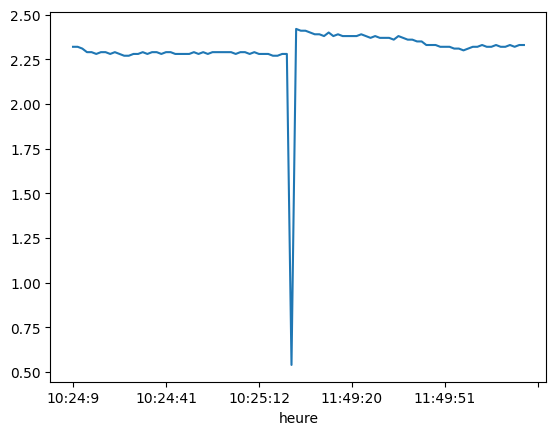

In [129]:
# bouilloire, microondes, four
filter=(.5<df['kWh'])
pic_high = df[filter]
pic_high['kWh'].plot()
len(pic_high)

537

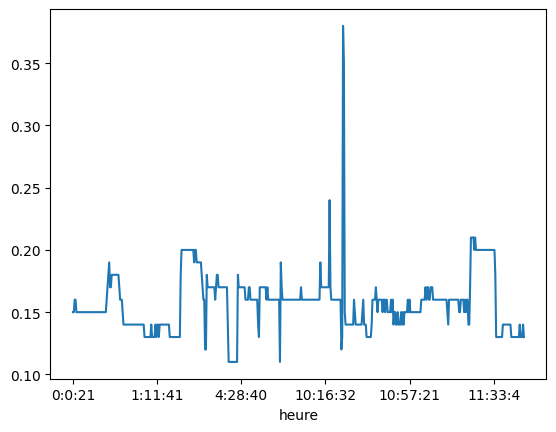

In [130]:
# frigo, moteur volet
pic_middle = df[(0.1<df['kWh']) & (df['kWh']<=.5)]
pic_middle['kWh'].plot()
len(pic_middle) # wh

1337

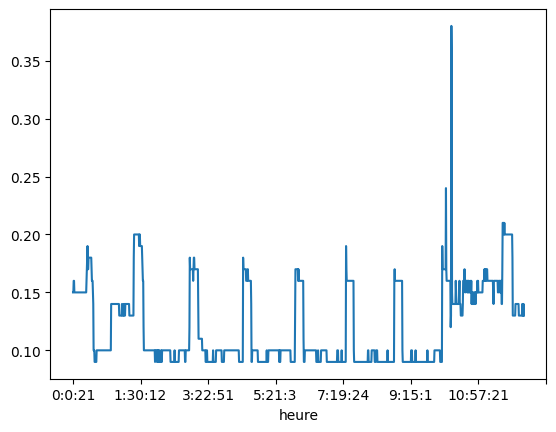

In [131]:
# pics frigo par jour
filter = (df['kWh']<=0.5)
pic_low = df[filter]
pic_low['kWh'].plot()
len(pic_low) # wh

In [132]:
time = conso_data['dates']
time


0        2024-03-07 01:48:30.258441
1        2024-03-07 01:48:56.501441
2        2024-03-07 01:49:22.386441
3        2024-03-07 01:49:48.140441
4        2024-03-07 01:50:13.914441
                    ...            
173254   2024-04-23 11:50:11.326441
173255   2024-04-23 11:50:12.872441
173256   2024-04-23 11:50:14.424441
173257   2024-04-23 11:50:15.969441
173258   2024-04-23 11:50:17.515441
Name: dates, Length: 173259, dtype: datetime64[ns]

In [133]:
def format_date(space=3):
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m\n%H:%M'))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(space))
    #plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=space))
    plt.gcf().autofmt_xdate()
    plt.grid()

In [134]:
if not old:
    major_ticks=1/60;minor_ticks=1/240  # plus de ticks, 4 fois plus de minor
    major_ticks=1/30;minor_ticks=1/120   # moins de ticks
    major_ticks=1/15;minor_ticks=1/60
    major_ticks=1/2;minor_ticks=1/8
else:
    major_ticks=4;minor_ticks=1   # encore moins si int


In [135]:
major_ticks=4;minor_ticks=1
major_ticks,minor_ticks

(4, 1)

## Main graph

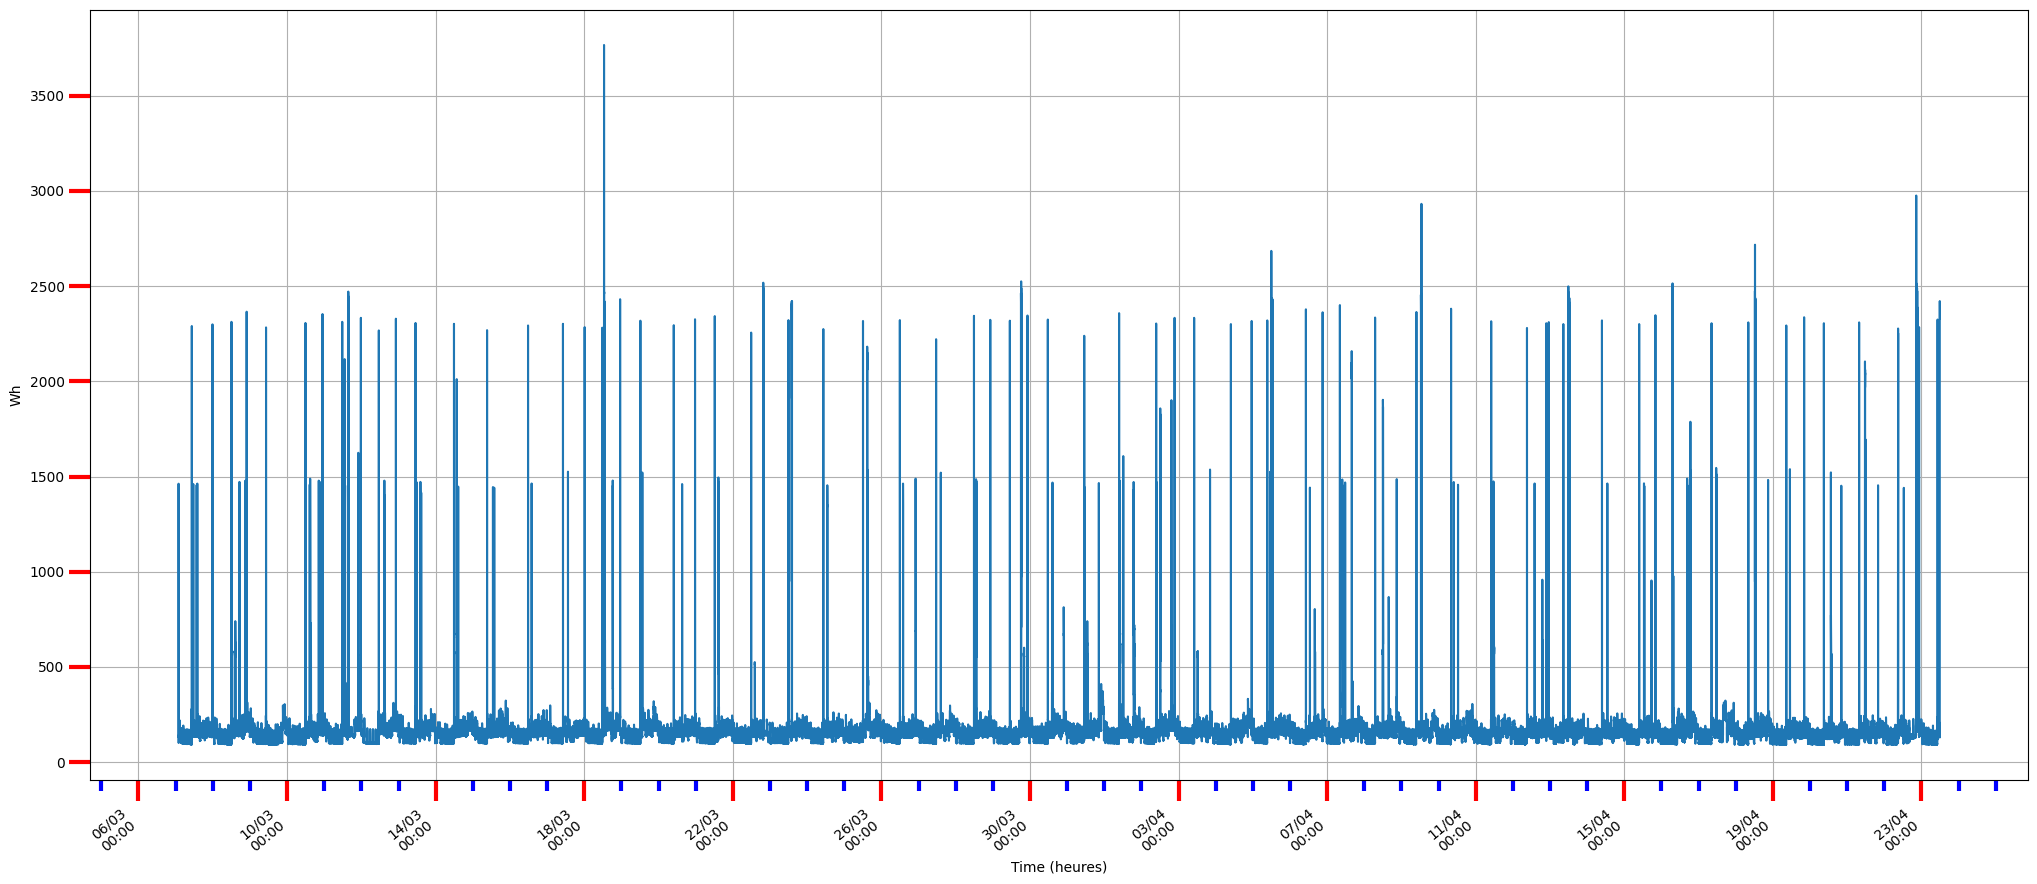

In [136]:

from matplotlib.dates import (YEARLY, DateFormatter,rrulewrapper, RRuleLocator, drange)

def show_graph():
    fig, ax = plt.subplots()
    # the size of A4 paper
    fig.set_size_inches(25, 10)

    #plt.rcParams['axes.autolimit_mode'] = 'round_numbers'
    
    #formatter = DateFormatter('%d/%m\n%H:%M:%S')
    formatter = DateFormatter('%d/%m\n%H:%M')
    ax.xaxis.set_major_formatter(formatter)

    # ticks sur axe des x
    ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
    ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))  # minor ticks tous les 5 min
    ax.tick_params(which='both', width=3)
    ax.tick_params(which='major', length=15, color='r')
    ax.tick_params(which='minor', length=8, color='b')

    #plt.plot(conso_data['cumul(ms)']/3600000,conso_data['Wh'])
    plt.plot(time,conso_data['Wh'])
    plt.ylabel('Wh')
    plt.xlabel('Time (heures)')
    #format_date(10)
    for label in ax.get_xticklabels():
        label.set_rotation(40)
        label.set_horizontalalignment('right')

    #fig.autofmt_xdate()
    
    plt.grid()
    plt.show()
show_graph()

In [137]:
cumul_conso = len(conso_data)
conso_data.tail(1)

,Interval,kWh,sec,Wh,cumul(ms),dates,days
173258,1546,2.33,1.546,2328.589909,4096933546,2024-04-23 11:50:17.515441,23/04/2024


In [138]:
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)
cumtime

4096933546000

# Slice of last 1 kWh

In [139]:
l = len(conso_data)  # total watt consommés
l

173259

In [140]:
k = 1
taille = k*1000  # fenetre k*1000 watt consommés
l,taille

(173259, 1000)

In [141]:
if l<1000:
    part = 1
else: part = 1/2
#taille = int(part*l)
taille

1000

In [142]:
data = conso_data.tail(taille)
len(data),data

(1000,
         Interval   kWh     sec           Wh   cumul(ms)  \
 172259     37077  0.10  37.077    97.095234  4067808282   
 172260     37089  0.10  37.089    97.063819  4067845371   
 172261     37135  0.10  37.135    96.943584  4067882506   
 172262     36864  0.10  36.864    97.656250  4067919370   
 172263     36801  0.10  36.801    97.823429  4067956171   
 ...          ...   ...     ...          ...         ...   
 173254      1554  2.32   1.554  2316.602317  4096927357   
 173255      1546  2.33   1.546  2328.589909  4096928903   
 173256      1552  2.32   1.552  2319.587629  4096930455   
 173257      1545  2.33   1.545  2330.097087  4096932000   
 173258      1546  2.33   1.546  2328.589909  4096933546   
 
                             dates        days  
 172259 2024-04-23 03:44:52.251441  23/04/2024  
 172260 2024-04-23 03:45:29.340441  23/04/2024  
 172261 2024-04-23 03:46:06.475441  23/04/2024  
 172262 2024-04-23 03:46:43.339441  23/04/2024  
 172263 2024-04-23 03:47:2

In [143]:
now = datetime.now()
# conso.csv dynamique
cumtime_start= int(conso_data._get_value(l-taille+1,'cumul(ms)')*1000) # conversion microseconds


In [144]:
cumtime_end= int(data._get_value(l-1,'cumul(ms)')*1000) # conversion microseconds


In [145]:
cumtime_end,cumtime_start

(4096933546000, 4067845371000)

In [146]:
#last_interval = int(data._get_value(l,'Interval')*1000) # conversion microseconds
delta_cumtime = cumtime_end - cumtime_start #+ last_interval
delta_cumtime

29088175000

In [147]:

base = now - timedelta(microseconds=delta_cumtime)
now,base, data['dates'][l-1].strftime('%d/%m/%Y %H:%M:%S')


(datetime.datetime(2024, 4, 23, 11, 51, 42, 752618),
 datetime.datetime(2024, 4, 23, 3, 46, 54, 577618),
 '23/04/2024 11:50:17')

In [148]:
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,26289,0.14,26.289,136.939404,26289,2024-03-07 01:48:30.258441,07/03/2024
1,26243,0.14,26.243,137.179438,52532,2024-03-07 01:48:56.501441,07/03/2024
2,25885,0.14,25.885,139.076685,78417,2024-03-07 01:49:22.386441,07/03/2024
3,25754,0.14,25.754,139.784111,104171,2024-03-07 01:49:48.140441,07/03/2024
4,25774,0.14,25.774,139.675642,129945,2024-03-07 01:50:13.914441,07/03/2024
...,...,...,...,...,...,...,...
173254,1554,2.32,1.554,2316.602317,4096927357,2024-04-23 11:50:11.326441,23/04/2024
173255,1546,2.33,1.546,2328.589909,4096928903,2024-04-23 11:50:12.872441,23/04/2024
173256,1552,2.32,1.552,2319.587629,4096930455,2024-04-23 11:50:14.424441,23/04/2024
173257,1545,2.33,1.545,2330.097087,4096932000,2024-04-23 11:50:15.969441,23/04/2024


In [149]:
end = conso_data['dates'][l-1].strftime('%d/%m/%Y %H:%M:%S')
start = conso_data['dates'][l-taille+1].strftime('%d/%m/%Y %H:%M:%S')
start,end

('23/04/2024 03:45:29', '23/04/2024 11:50:17')

In [150]:
data.head(1)['dates'].to_string(index=False),data.tail(1)['dates'].to_string(index=False)

('2024-04-23 03:44:52.251441', '2024-04-23 11:50:17.515441')

In [151]:
k

1

In [152]:
data.Interval.tail(1000)

172259    37077
172260    37089
172261    37135
172262    36864
172263    36801
          ...  
173254     1554
173255     1546
173256     1552
173257     1545
173258     1546
Name: Interval, Length: 1000, dtype: int64

In [153]:
conversion_us_heure = 1/1000/60/60 
temps_1kWh = sum(data.Interval.tail(1000))*conversion_us_heure  #somme 1000 interval = temps conso 1 kWh
conso_jour = 24/temps_1kWh
heure = int(temps_1kWh)
mn = (temps_1kWh - heure)*60
sec = (mn - int(mn))*60
temps_1kWh, conso_jour,heure,int(mn),int(sec)

(8.10065027777778, 2.9627251118145823, 8, 6, 2)

In [154]:
data['heure']=conso_data['dates']#.strftime('%d/%m/%Y %H:%M:%S')

C:\Users\jean\AppData\Local\Temp\ipykernel_1212\3458501435.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['heure']=conso_data['dates']#.strftime('%d/%m/%Y %H:%M:%S')


In [155]:
data

,Interval,kWh,sec,Wh,cumul(ms),dates,days,heure
172259,37077,0.10,37.077,97.095234,4067808282,2024-04-23 03:44:52.251441,23/04/2024,2024-04-23 03:44:52.251441
172260,37089,0.10,37.089,97.063819,4067845371,2024-04-23 03:45:29.340441,23/04/2024,2024-04-23 03:45:29.340441
172261,37135,0.10,37.135,96.943584,4067882506,2024-04-23 03:46:06.475441,23/04/2024,2024-04-23 03:46:06.475441
172262,36864,0.10,36.864,97.656250,4067919370,2024-04-23 03:46:43.339441,23/04/2024,2024-04-23 03:46:43.339441
172263,36801,0.10,36.801,97.823429,4067956171,2024-04-23 03:47:20.140441,23/04/2024,2024-04-23 03:47:20.140441
...,...,...,...,...,...,...,...,...
173254,1554,2.32,1.554,2316.602317,4096927357,2024-04-23 11:50:11.326441,23/04/2024,2024-04-23 11:50:11.326441
173255,1546,2.33,1.546,2328.589909,4096928903,2024-04-23 11:50:12.872441,23/04/2024,2024-04-23 11:50:12.872441
173256,1552,2.32,1.552,2319.587629,4096930455,2024-04-23 11:50:14.424441,23/04/2024,2024-04-23 11:50:14.424441
173257,1545,2.33,1.545,2330.097087,4096932000,2024-04-23 11:50:15.969441,23/04/2024,2024-04-23 11:50:15.969441


<Axes: >

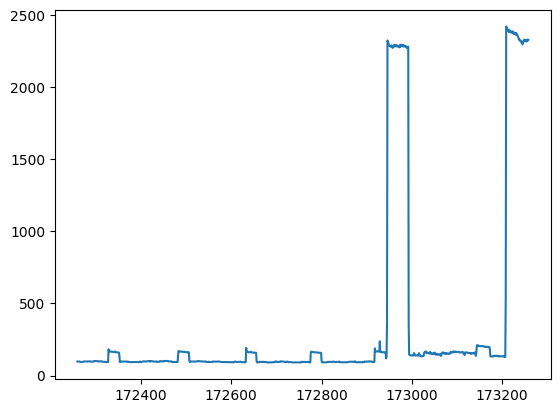

In [156]:
#data.tail(600)['Wh'].plot()
data['Wh'].plot()

In [157]:
data['Wh']

172259      97.095234
172260      97.063819
172261      96.943584
172262      97.656250
172263      97.823429
             ...     
173254    2316.602317
173255    2328.589909
173256    2319.587629
173257    2330.097087
173258    2328.589909
Name: Wh, Length: 1000, dtype: float64

# k kW window graph

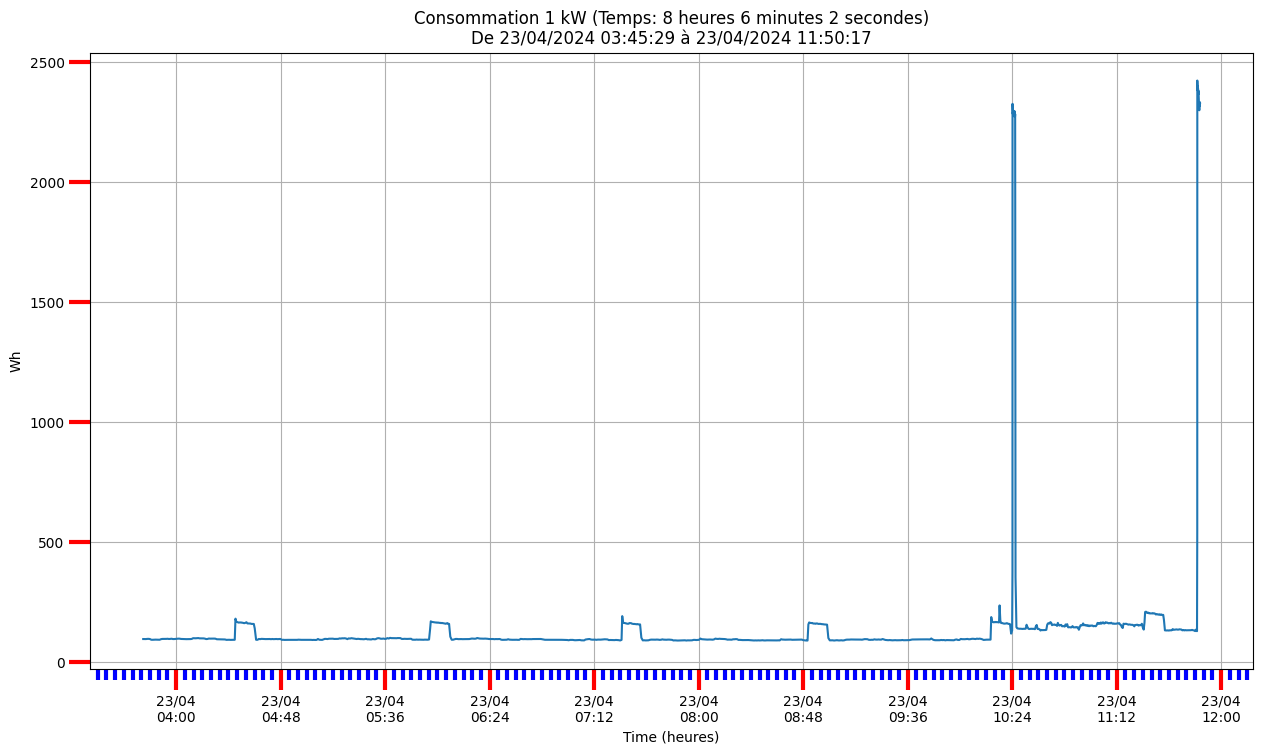

In [158]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(15, 8)

formatter = DateFormatter('%d/%m\n%H:%M')
ax.xaxis.set_major_formatter(formatter)

# ticks sur axe des x
major_ticks=1/30;minor_ticks=1/360
ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # 1 major tick tous les 48 min
ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))  # 1 minor ticks tous les 4 min
ax.tick_params(which='both', width=3)
ax.tick_params(which='major', length=15, color='r')
ax.tick_params(which='minor', length=8, color='b')

plt.title(f'Consommation {k} kW (Temps: {heure} heures {int(mn)} minutes {int(sec)} secondes)\nDe {start} à {end}')
plt.plot(data['dates'],data['Wh'])
plt.ylabel('Wh')
plt.xlabel('Time (heures)')
plt.grid()


<Axes: ylabel='Frequency'>

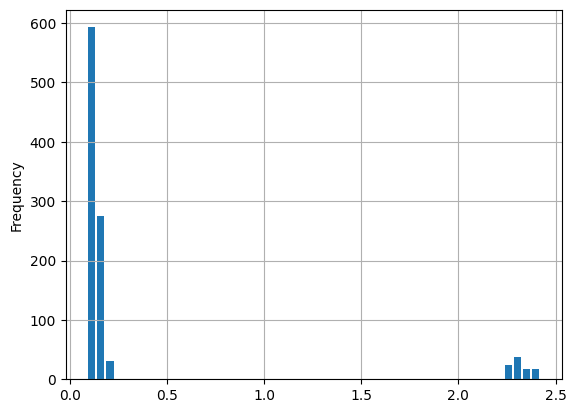

In [159]:
data.kWh.plot.hist(bins=50,rwidth=0.8,grid=True)


In [160]:
conso_data.tail()

,Interval,kWh,sec,Wh,cumul(ms),dates,days
173254,1554,2.32,1.554,2316.602317,4096927357,2024-04-23 11:50:11.326441,23/04/2024
173255,1546,2.33,1.546,2328.589909,4096928903,2024-04-23 11:50:12.872441,23/04/2024
173256,1552,2.32,1.552,2319.587629,4096930455,2024-04-23 11:50:14.424441,23/04/2024
173257,1545,2.33,1.545,2330.097087,4096932000,2024-04-23 11:50:15.969441,23/04/2024
173258,1546,2.33,1.546,2328.589909,4096933546,2024-04-23 11:50:17.515441,23/04/2024


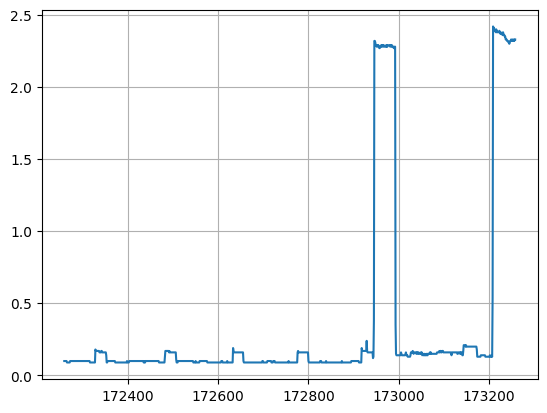

In [161]:
conso_data.tail(1000)['kWh'].plot()
plt.grid()

In [162]:
#plt.plot(conso_data['sec'])
now = dt.datetime.now()
last_cumul = np.array(conso_data['cumul(ms)'].tail(1))[0]*1000.0  # us
last_cumul, last_cumul/60e6  # min

(4096933546000.0, 68282.22576666667)

In [163]:
begin = now - dt.timedelta(microseconds=last_cumul)  #2023, 6, 24, 9, 14, (39, 942895) approximatif
now, begin

(datetime.datetime(2024, 4, 23, 11, 52, 22, 323671),
 datetime.datetime(2024, 3, 7, 1, 50, 8, 777671))

In [164]:
x = mdates.drange(begin,now,dt.timedelta(microseconds=1000000))  # seconds
len(conso_data),len(x),len(x)/3600

(173259, 4096934, 1138.0372222222222)

In [165]:
def format_date(space=3):
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m\n%H:%M'))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(space))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=space))
    plt.gcf().autofmt_xdate()
    plt.grid()

In [166]:
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
base = dt.datetime(2005, 2, 1)
dates = [base + dt.timedelta(hours=(2 * i)) for i in range(732)]
N = len(dates)
N


732

In [167]:
732/12 # 60 jours

61.0

In [168]:
dates[0],dates[-1]

(datetime.datetime(2005, 2, 1, 0, 0), datetime.datetime(2005, 4, 2, 22, 0))

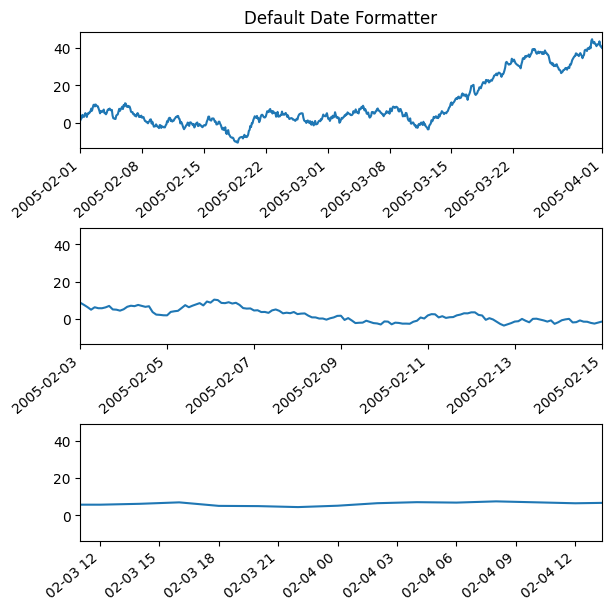

In [169]:
np.random.seed(19680801)
y = np.cumsum(np.random.randn(N))

fig, axs = plt.subplots(3, 1, layout='constrained', figsize=(6, 6))
lims = [(np.datetime64('2005-02'), np.datetime64('2005-04')),
        (np.datetime64('2005-02-03'), np.datetime64('2005-02-15')),
        (np.datetime64('2005-02-03 11:00'), np.datetime64('2005-02-04 13:20'))]
for nn, ax in enumerate(axs):
    ax.plot(dates, y)
    ax.set_xlim(lims[nn])
    # rotate_labels...
    for label in ax.get_xticklabels():
        label.set_rotation(40)
        label.set_horizontalalignment('right')
axs[0].set_title('Default Date Formatter')
plt.show()

In [170]:
t = dt.datetime(2005, 4, 2, 22, 0)
t

datetime.datetime(2005, 4, 2, 22, 0)